---
MAT421 - Applied Computational Methods

Arizona State University

Homework #3

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 17 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 17. Interpolation
---

## 17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation uses a single polynomial function that goes through all data points to estimate the output of a given input. The single polynomial is referred to as a Lagrange polynomial, $L(x)$. The Lagrange polynomial interpolation has the property that $L(x_i)=y_i$ for every data point in the set. A Lagrange polynomial is written as a linear combination of Lagrange basis polynomials, $P_i(x)$.

$L(x)=\sum_{i=1}^ny_iP_i(x)$ where $P_i(x)=\prod_{j=1,j\neq{i}}^n\frac{x-x_{j}}{x_i-x_j}$

$P_i(x)$ has the properties that $P_i(x_j)=1$ when $i=j$ and $P_i(x_j)=0$ when $i\neq{j}$.

Below is a Python script that plots and performs Lagrange polynomial interpolation for a given input.

Interpolation Value:  2.884552001974498


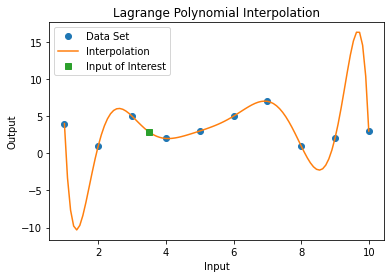

In [13]:
# import for plotting
import matplotlib.pyplot as plt
# import for array functions
import numpy as np
# import for Lagrange polynomial interpolation
from scipy.interpolate import lagrange

# reliable data set
x = [1,2,3,4,5,6,7,8,9,10]
y = [4,1,5,2,3,5,7,1,2,3]

# create a new vector of input values for interpolation methods
x_new = np.linspace(np.min(x),np.max(x),100)

# point of interest
point_interest = 3.5

# create Lagrange polynomial interpolation function for data set
f = lagrange(x,y)

# create output values from Lagrange polynomial interpolation function
y_new = f(x_new)
# create output for input of interest
y_hat = f(point_interest)

# print the estimated value for the given input
print('Interpolation Value: ',y_hat)

# plot data set
plt.plot(x,y,'o',label='Data Set')
# plot the Lagrange polynomial interpolation
plt.plot(x_new,y_new,'-',label='Interpolation')
# plot estimated point
plt.plot(point_interest,y_hat,'s',label='Input of Interest')

# title, label plot and add legend
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# show plot
plt.show()


## 17.5 Newton's Polynomial Interpolation

Newton's polynomial interpolation is another method of using a single polynomial function that goes through all data points to estimate the output for a given input. The Newton's polynomial interpolation has the property that $f(x_i)=y_i$ for every data point in the set.

The Newton's polynomial can be written as $f(x)=\sum_{i=0}^na_in_i(x)$ where $n_i=\prod_{j=0}^{i-1}(x-x_j)$.

The coefficients $a_i$ of the Newton's polynomial can be determined using a recurrent process called divided differences.

Below is a Python script that plots and performs Newton's polynomial interpolation for a given input.

Interpolation Value:  2.8845520019531254


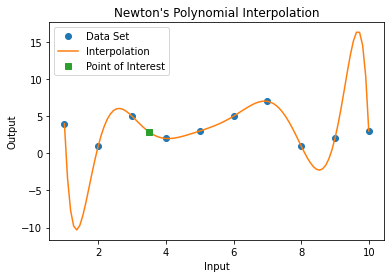

In [14]:
def divided_diff(x, y): 
    ''' 
    function to calculate the divided 
    differences table 
    ''' 
    n = len(y) 
    coef = np.zeros([n, n]) 
    # the first column is y 
    coef[:,0] = y 
     
    for j in range(1,n): 
        for i in range(n-j): 
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i]) 
             
    return coef 
 
def newton_poly(coef, x_data, x): 
    ''' 
    evaluate the newton polynomial  
    at x 
    ''' 
    n = len(x_data) - 1  
    p = coef[n] 
    for k in range(1,n+1): 
        p = coef[n-k] + (x -x_data[n-k])*p 
    return p

# get the divided difference coef 
a_s = divided_diff(x, y)[0, :] 
 
# create output values from Newton's polynomial interpolation function
y_new = newton_poly(a_s, x, x_new) 
# create output for input of interest
y_hat = newton_poly(a_s,x,point_interest)

# print the estimated value for the given input
print('Interpolation Value: ',y_hat)

# plot the data set
plt.plot(x, y,'o',label='Data Set') 
# plot the Newton's polynomial interpolation
plt.plot(x_new,y_new,'-',label='Interpolation')
# plot estimated point
plt.plot(point_interest,y_hat,'s',label='Point of Interest')

# title, label plot and add legend
plt.title('Newton\'s Polynomial Interpolation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# show plot
plt.show()
